# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations size=1500
lats = np.random.uniform(lat_range[0], lat_range[1], size=100)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=100)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

74

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# base_url='http://api.openweathermap.org/data/2.5/weather?'
# params = {
#     'q':
#     'appid':weather_api_key
# }

In [4]:
weather_dict = []
units='imperial'

for indx, city in enumerate(cities):
    url = f'http://api.openweathermap.org/data/2.5/weather?q={city}&appid={weather_api_key}&units={units}'
    data = requests.get(url).json()
    try:
        cty = city
        lt= data['coord']['lat']
        lg= data['coord']['lon']
        mxt= data['main']['temp_max']
        hmd=data['main']['humidity']
        cld=data['clouds']['all']
        wspd=data['wind']['speed']
        ctry=data['sys']['country']
        dt=data['dt']
        
        values = [cty,lt,lg,mxt,hmd,cld,wspd,ctry,dt]
        
        weather_dict.append(values)
        
        print(f'Processing Record {indx+1} of Set 1 | {city}')

    except KeyError:
        print("City not found. Skipping")

Processing Record 1 of Set 1 | castro
City not found. Skipping
Processing Record 3 of Set 1 | richards bay
Processing Record 4 of Set 1 | punta arenas
Processing Record 5 of Set 1 | kapaa
Processing Record 6 of Set 1 | mahebourg
Processing Record 7 of Set 1 | smithers
Processing Record 8 of Set 1 | berlevag
Processing Record 9 of Set 1 | esperance
Processing Record 10 of Set 1 | bluff
Processing Record 11 of Set 1 | kattivakkam
Processing Record 12 of Set 1 | busselton
Processing Record 13 of Set 1 | derzhavinsk
Processing Record 14 of Set 1 | lebu
Processing Record 15 of Set 1 | honningsvag
Processing Record 16 of Set 1 | businga
Processing Record 17 of Set 1 | arraial do cabo
Processing Record 18 of Set 1 | clyde river
Processing Record 19 of Set 1 | spornoye
Processing Record 20 of Set 1 | kodiak
Processing Record 21 of Set 1 | general roca
Processing Record 22 of Set 1 | ilulissat
Processing Record 23 of Set 1 | dikson
Processing Record 24 of Set 1 | avarua
Processing Record 25 of 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
col = ['City', 'Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness', 'Wind Speed', 'Country', 'Date']
weather_df = pd.DataFrame(weather_dict,columns=col)
weather_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,castro,-24.7911,-50.0119,57.06,77,0,3.47,BR,1634947702
1,richards bay,-28.7830,32.0377,67.75,87,26,2.75,ZA,1634947702
2,punta arenas,-53.1500,-70.9167,39.31,81,20,26.46,CL,1634947529
3,kapaa,22.0752,-159.3190,82.38,77,75,4.00,US,1634947703
4,mahebourg,-20.4081,57.7000,73.26,83,69,11.86,MU,1634947439
...,...,...,...,...,...,...,...,...,...
65,maldonado,-34.6667,-54.9167,60.22,95,98,4.88,UY,1634947725
66,airai,-8.9266,125.4092,73.53,51,96,1.25,TL,1634947726
67,rosario,-32.9468,-60.6393,65.61,80,98,11.01,AR,1634947653
68,husavik,66.0449,-17.3389,35.65,94,100,7.02,IS,1634947726


In [6]:
weather_df.to_csv("weather_raw.csv")

In [7]:
weather_df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,7.000000e+01
mean,17.208231,-6.575024,55.583571,72.228571,61.014286,9.410286,1.634948e+09
std,40.590001,98.535953,21.434577,17.780605,38.571782,6.605870,8.982325e+01
min,-54.800000,-159.775000,-1.050000,19.000000,0.000000,0.000000,1.634947e+09
25%,-21.007875,-73.887150,41.417500,65.000000,21.500000,4.475000,1.634948e+09
50%,19.281850,-10.661250,56.830000,76.000000,75.000000,8.050000,1.634948e+09
75%,54.141550,71.060675,73.427500,82.750000,98.750000,12.482500,1.634948e+09
max,77.484000,172.790200,90.320000,100.000000,100.000000,26.750000,1.634948e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [8]:
#  Get the indices of cities that have humidity over 100%.
drop_index=weather_df.loc[weather_df['Humidity']>100,:].index
drop_index

Int64Index([], dtype='int64')

In [9]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
clean_city_data = weather_df.drop(index=drop_index,inplace=False)
clean_city_data

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,castro,-24.7911,-50.0119,57.06,77,0,3.47,BR,1634947702
1,richards bay,-28.7830,32.0377,67.75,87,26,2.75,ZA,1634947702
2,punta arenas,-53.1500,-70.9167,39.31,81,20,26.46,CL,1634947529
3,kapaa,22.0752,-159.3190,82.38,77,75,4.00,US,1634947703
4,mahebourg,-20.4081,57.7000,73.26,83,69,11.86,MU,1634947439
...,...,...,...,...,...,...,...,...,...
65,maldonado,-34.6667,-54.9167,60.22,95,98,4.88,UY,1634947725
66,airai,-8.9266,125.4092,73.53,51,96,1.25,TL,1634947726
67,rosario,-32.9468,-60.6393,65.61,80,98,11.01,AR,1634947653
68,husavik,66.0449,-17.3389,35.65,94,100,7.02,IS,1634947726


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

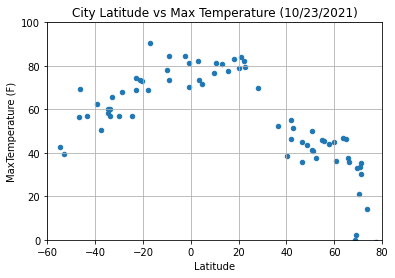

In [10]:
clean_city_data.plot('Lat','Max Temp',kind='scatter',xlabel='Latitude',ylabel='MaxTemperature (F)',
                     title='City Latitude vs Max Temperature (10/23/2021)',grid=True,xlim=(-60,80),ylim=(0,100))
plt.show()

## Latitude vs. Humidity Plot

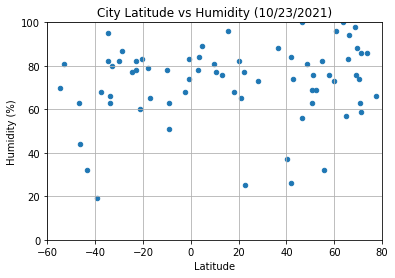

In [11]:
clean_city_data.plot('Lat','Humidity',kind='scatter',xlabel='Latitude',ylabel='Humidity (%)',
                     title='City Latitude vs Humidity (10/23/2021)',grid=True,xlim=(-60,80),ylim=(0,100))
plt.show()

## Latitude vs. Cloudiness Plot

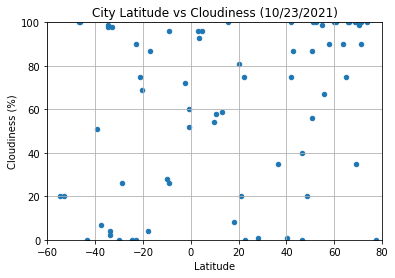

In [12]:
clean_city_data.plot('Lat','Cloudiness',kind='scatter',xlabel='Latitude',ylabel='Cloudiness (%)',
                     title='City Latitude vs Cloudiness (10/23/2021)',grid=True,xlim=(-60,80),ylim=(0,100))
plt.show()

## Latitude vs. Wind Speed Plot

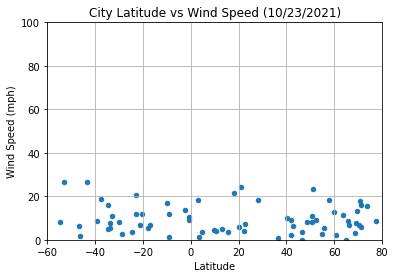

In [13]:
clean_city_data.plot('Lat','Wind Speed',kind='scatter',xlabel='Latitude',ylabel='Wind Speed (mph)',
                     title='City Latitude vs Wind Speed (10/23/2021)',grid=True,xlim=(-60,80),ylim=(0,100))
plt.show()

## Linear Regression

In [15]:
n_hemisphere = clean_city_data.loc[clean_city_data['Lat']>0]
s_hemisphere = clean_city_data.loc[clean_city_data['Lat']<0]

n_lat = n_hemisphere['Lat']
s_lat = s_hemisphere['Lat']

In [16]:
# Northern Hemisphere Linear Regressions
Ntemp_slope, Ntemp_intercept, Ntemp_r_value, Ntemp_p_value, Ntemp_std = linregress(n_hemisphere['Lat'],n_hemisphere['Max Temp'])

Nhm_slope, Nhm_intercept, Nhm_r_value, Nhm_p_value, Nhm_std = linregress(n_hemisphere['Lat'],n_hemisphere['Humidity'])

Ncl_slope, Ncl_intercept, Ncl_r_value, Ncl_p_value, Ncl_std = linregress(n_hemisphere['Lat'],n_hemisphere['Cloudiness'])

Nws_slope, Nws_intercept, Nws_r_value, Nws_p_value, Nws_std = linregress(n_hemisphere['Lat'],n_hemisphere['Wind Speed'])

# Southern Hemisphere Linear Regressions
Stemp_slope, Stemp_intercept, Stemp_r_value, Stemp_p_value, Stemp_std = linregress(s_hemisphere['Lat'],s_hemisphere['Max Temp'])

Shm_slope, Shm_intercept, Shm_r_value, Shm_p_value, Shm_std = linregress(s_hemisphere['Lat'],s_hemisphere['Humidity'])

Scl_slope, Scl_intercept, Scl_r_value, Scl_p_value, Scl_std = linregress(s_hemisphere['Lat'],s_hemisphere['Cloudiness'])

Sws_slope, Sws_intercept, Sws_r_value, Sws_p_value, Sws_std = linregress(s_hemisphere['Lat'],s_hemisphere['Wind Speed'])

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is -0.8980123644693025


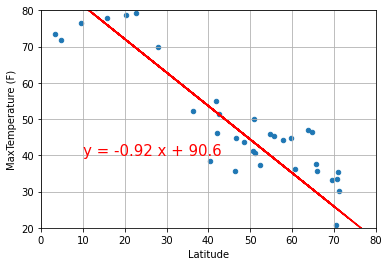

In [28]:
print(f'The r-value is {Ntemp_r_value}')
n_hemisphere.plot('Lat','Max Temp',kind='scatter',xlabel='Latitude',ylabel='MaxTemperature (F)',
                     grid=True,xlim=(0,80),ylim=(20,80))
n_temp_fit = Ntemp_slope*n_lat+Ntemp_intercept
eq_n_temp = (f'y = {round(Ntemp_slope,2)} x + {round(Ntemp_intercept,2)}')
plt.annotate(eq_n_temp,(10,40),fontsize=15,color='r')
plt.plot(n_lat,n_temp_fit,color='r')
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is 0.8192295608867898


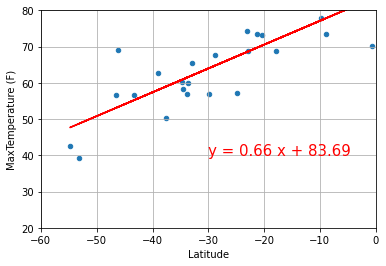

In [27]:
print(f'The r-value is {Stemp_r_value}')
s_hemisphere.plot('Lat','Max Temp',kind='scatter',xlabel='Latitude',ylabel='MaxTemperature (F)',
                     grid=True,xlim=(-60,0),ylim=(20,80))
s_temp_fit = Stemp_slope*s_lat+Stemp_intercept
eq_s_temp = (f'y = {round(Stemp_slope,2)} x + {round(Stemp_intercept,2)}')
plt.annotate(eq_s_temp,(-30,40),fontsize=15,color='r')
plt.plot(s_lat,s_temp_fit,color='r')
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is 0.029018747683620123


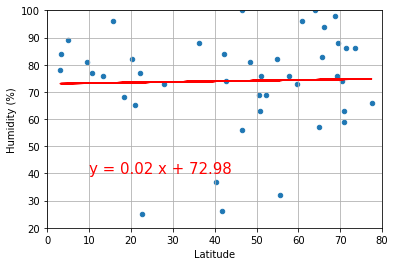

In [26]:
print(f'The r-value is {Nhm_r_value}')
n_hemisphere.plot('Lat','Humidity',kind='scatter',xlabel='Latitude',ylabel='Humidity (%)',
                     grid=True,xlim=(0,80),ylim=(20,100))
n_hm_fit = Nhm_slope*n_lat+Nhm_intercept
eq_n_hm = (f'y = {round(Nhm_slope,2)} x + {round(Nhm_intercept,2)}')
plt.annotate(eq_n_hm,(10,40),fontsize=15,color='r')
plt.plot(n_lat,n_hm_fit,color='r')
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is 0.21792894692377013


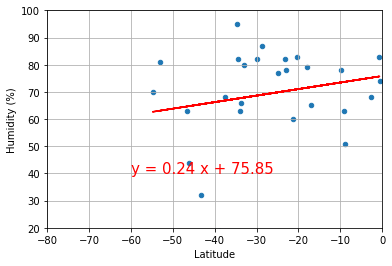

In [29]:
print(f'The r-value is {Shm_r_value}')
s_hemisphere.plot('Lat','Humidity',kind='scatter',xlabel='Latitude',ylabel='Humidity (%)',
                     grid=True,xlim=(-80,0),ylim=(20,100))
s_hm_fit = Shm_slope*s_lat+Shm_intercept
eq_s_hm = (f'y = {round(Shm_slope,2)} x + {round(Shm_intercept,2)}')
plt.annotate(eq_s_hm,(-60,40),fontsize=15,color='r')
plt.plot(s_lat,s_hm_fit,color='r')
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is 0.24168672477633543


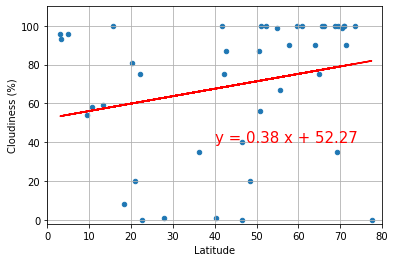

In [34]:
print(f'The r-value is {Ncl_r_value}')
n_hemisphere.plot('Lat','Cloudiness',kind='scatter',xlabel='Latitude',ylabel='Cloudiness (%)',
                     grid=True,xlim=(0,80),ylim=(-2,110))
n_cl_fit = Ncl_slope*n_lat+Ncl_intercept
eq_n_cl = (f'y = {round(Ncl_slope,2)} x + {round(Ncl_intercept,2)}')
plt.annotate(eq_n_cl,(40,40),fontsize=15,color='r')
plt.plot(n_lat,n_cl_fit,color='r')
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is 0.10631523818211519


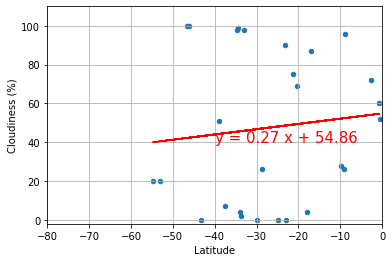

In [33]:
print(f'The r-value is {Scl_r_value}')
s_hemisphere.plot('Lat','Cloudiness',kind='scatter',xlabel='Latitude',ylabel='Cloudiness (%)',
                     grid=True,xlim=(-80,0),ylim=(-2,110))
s_cl_fit = Scl_slope*s_lat+Scl_intercept
eq_s_cl = (f'y = {round(Scl_slope,2)} x + {round(Scl_intercept,2)}')
plt.annotate(eq_s_cl,(-40,40),fontsize=15,color='r')
plt.plot(s_lat,s_cl_fit,color='r')
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is 0.0747391421325366


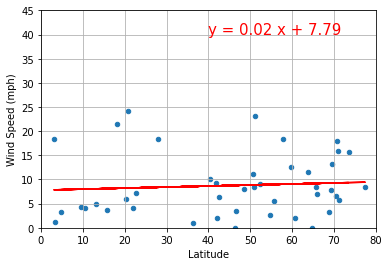

In [32]:
print(f'The r-value is {Nws_r_value}')
n_hemisphere.plot('Lat','Wind Speed',kind='scatter',xlabel='Latitude',ylabel='Wind Speed (mph)',
                     grid=True,xlim=(0,80),ylim=(0,45))
n_ws_fit = Nws_slope*n_lat+Nws_intercept
eq_n_ws = (f'y = {round(Nws_slope,2)} x + {round(Nws_intercept,2)}')
plt.annotate(eq_n_ws,(40,40),fontsize=15,color='r')
plt.plot(n_lat,n_ws_fit,color='r')
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is -0.14729159272356737


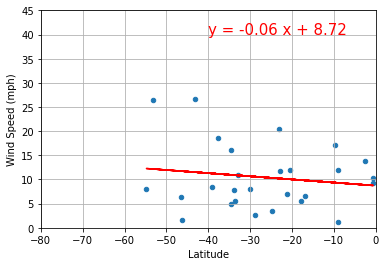

In [31]:
print(f'The r-value is {Sws_r_value}')
s_hemisphere.plot('Lat','Wind Speed',kind='scatter',xlabel='Latitude',ylabel='Wind Speed (mph)',
                     grid=True,xlim=(-80,0),ylim=(0,45))
s_ws_fit = Sws_slope*s_lat+Sws_intercept
eq_s_ws = (f'y = {round(Sws_slope,2)} x + {round(Sws_intercept,2)}')
plt.annotate(eq_s_ws,(-40,40),fontsize=15,color='r')
plt.plot(s_lat,s_ws_fit,color='r')
plt.show()